In [1]:
# import all libary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# read the data 
data = pd.read_csv("campusplacement.csv")

In [4]:
# print the data
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#to create duplicate copy
cp_copy= data.copy()


In [6]:
df_copy= data.copy()
df_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
# shape of data like rows and cloumn
df_copy.shape

(215, 15)

In [8]:
# to print the4 data types of that column name
df_copy.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [9]:
#how tovheck null values
df_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
# nan value replace with 0 value in salary column
df_copy['salary'].fillna(value=0, inplace=True)

In [11]:
df_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
#drop some columns because it is unnecssary data to train the model
df_copy.drop(['sl_no','ssc_b','hsc_b'], axis=1, inplace=True) # {axis =1 it is used for column and row for axis =0}

In [13]:
df_copy

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,0,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,0,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,1,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Text(0.5, 1.0, 'Employee percentage')

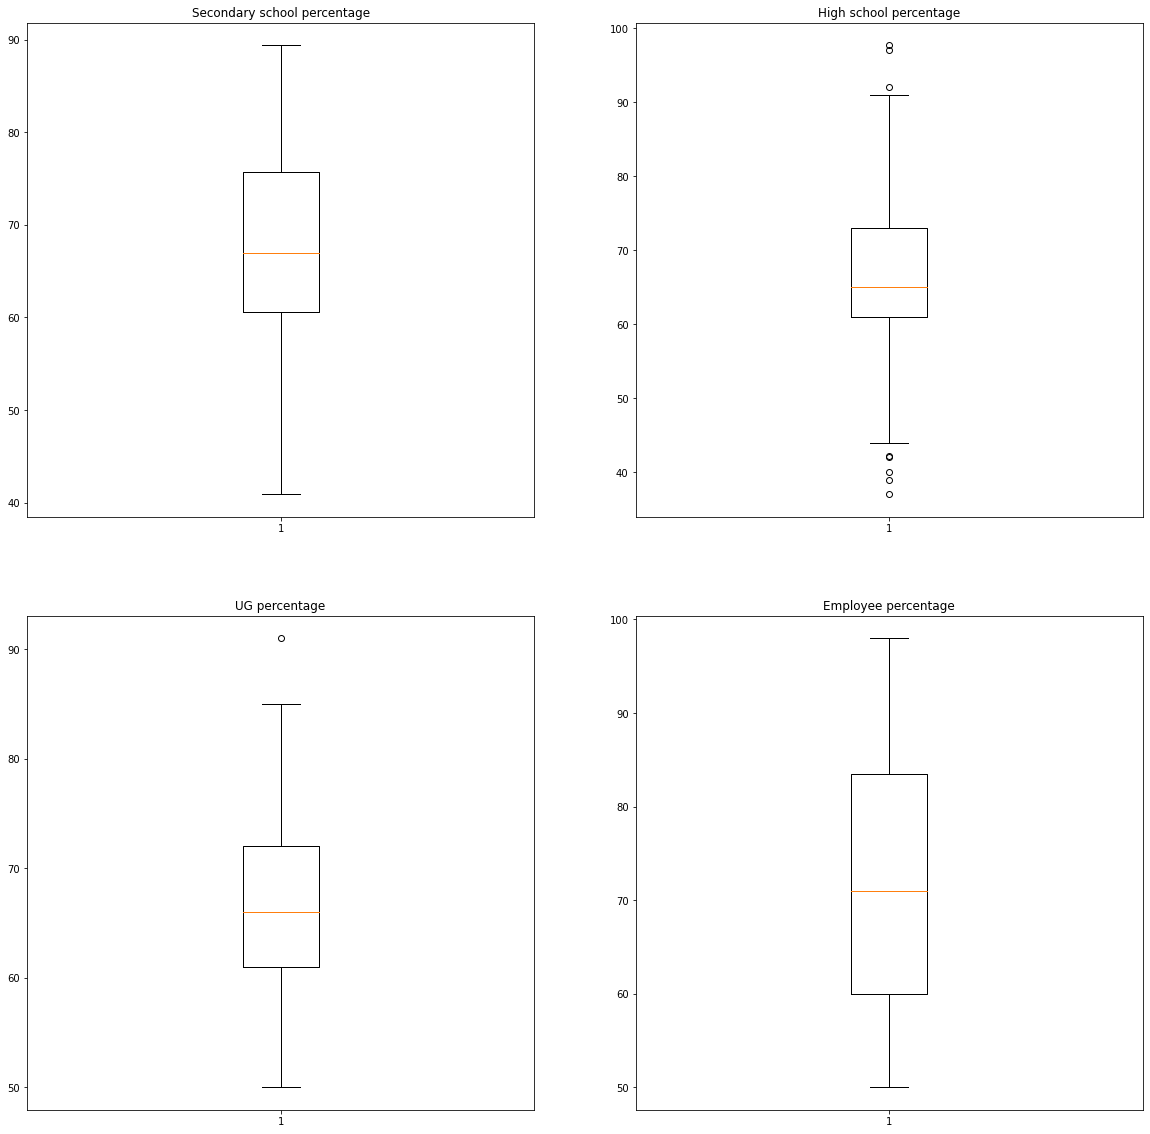

In [14]:
#how to handle Outlier
#plotting bocplot to identify the outlier

plt.figure(figsize=(20,20))                   # it is a size of graph
ax=plt.subplot(221)                     #it means 22 means 2 * 2 matrix it means have 4 graph and 1 is represnting pointing of the first graph
plt.boxplot(df_copy['ssc_p'])
ax.set_title('Secondary school percentage')

ax=plt.subplot(222)                             # 2 is represnting pointing of the second graph
plt.boxplot(df_copy['hsc_p'])
ax.set_title('High school percentage')

ax=plt.subplot(223)                          # 3 is represnting pointing of the 3 graph
plt.boxplot(df_copy['degree_p'])
ax.set_title('UG percentage')

ax=plt.subplot(224)                              # 4 is represnting pointing of the fourth graph
plt.boxplot(df_copy['etest_p'])
ax.set_title('Employee percentage')

In [15]:
# conclusion -- more outliers in second graph and remove that outlier and in case of 3rd figure there is one outlier and it is neglect because it doesnot affect our model

In [16]:
Q1 = df_copy['hsc_p'].quantile(0.25)    # it means first Quartile 
Q3 = df_copy['hsc_p'].quantile(0.75)    #it means Third Quartile
IQR= Q3-Q1                              # it is interquartile range

filter = (df_copy['hsc_p'] >= Q1-1.5*IQR) & (df_copy['hsc_p']<= Q3+1.5*IQR)   # it filter or delete the otlier
df_filter =df_copy.loc[filter]                                                          # it means New filter data

{'whiskers': [<matplotlib.lines.Line2D at 0x167c48a4f70>,
 'caps': [<matplotlib.lines.Line2D at 0x167c48b3670>,
 'boxes': [<matplotlib.lines.Line2D at 0x167c48a4c10>],
 'medians': [<matplotlib.lines.Line2D at 0x167c48b3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x167c48bf070>],
 'means': []}

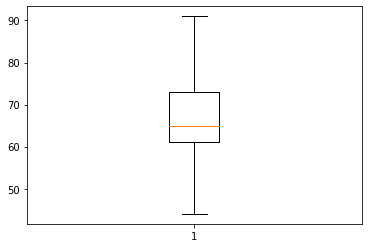

In [17]:
plt.boxplot(df_filter['hsc_p'])

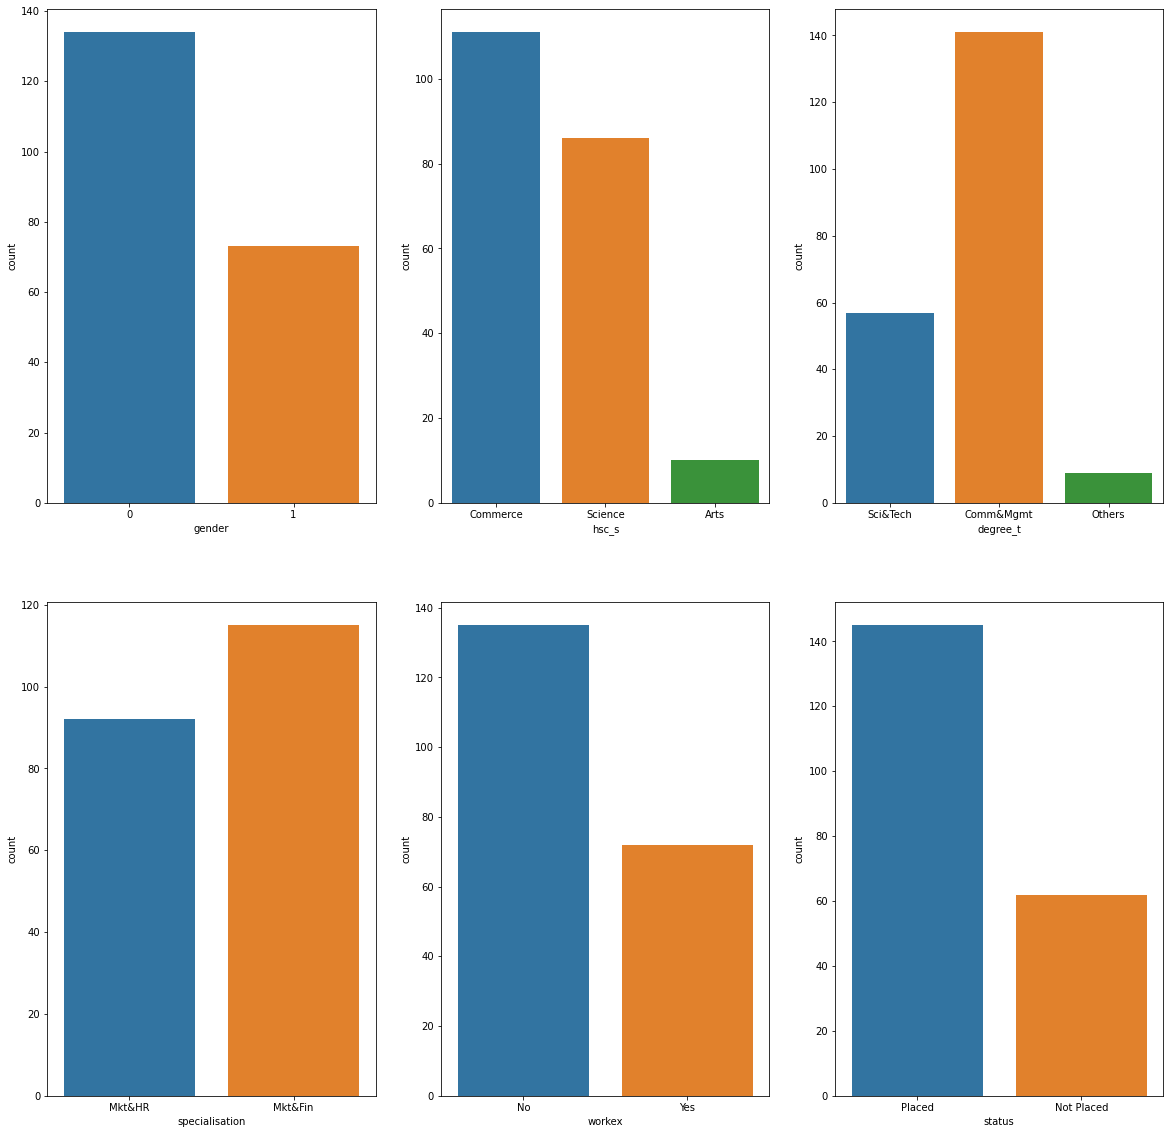

In [18]:
#data visualization

plt.figure(figsize=(20,20))                 # it is a size of graph

plt.subplot(231)                              # it is 2 * 3 matrix
ax=sns.countplot(x='gender', data =df_filter)

plt.subplot(232)
ax=sns.countplot(x='hsc_s', data =df_filter)

plt.subplot(233)
ax=sns.countplot(x='degree_t', data =df_filter)

plt.subplot(234)
ax=sns.countplot(x='specialisation', data =df_filter)

plt.subplot(235)
ax=sns.countplot(x='workex', data =df_filter)

plt.subplot(236)
ax=sns.countplot(x='status', data =df_filter)


C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

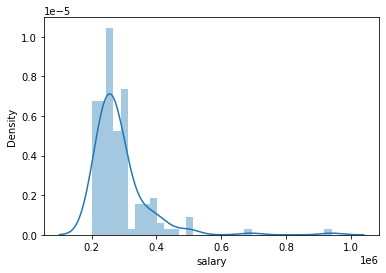

In [19]:
df_placed = df_filter[df_filter.salary!=0]        #it means this student is palced 
sns.distplot(df_placed['salary'])

In [20]:
#most of salary lies in between 2 lakhs and 4 lakhs and average is 3 lakhs 

In [21]:
#encoding it means categorgical data convert into numerical data machine understand numerical data

In [22]:
#labelenconding

from sklearn.preprocessing import LabelEncoder

object_cols =['workex','specialisation', 'status']
label_encoder = LabelEncoder()

for col in object_cols:
    df_filter[col] = label_encoder.fit_transform(df_filter[col])
    
df_filter.head()


<ipython-input-22-cc75c99d3d0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[col] = label_encoder.fit_transform(df_filter[col])


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [23]:
#one hot encoding --- it means create news colums for different catogories like commmerece , arts , science in the given datasets 
dummy_hsc_s = pd.get_dummies(df_filter['hsc_s'], prefix ='dummy')
dummy_degree_t= pd.get_dummies(df_filter['degree_t'], prefix ='dummy')

df_coded= pd.concat([df_filter,dummy_hsc_s, dummy_degree_t  ] ,axis=1)
df_coded.drop(['hsc_s', 'degree_t', "salary","etest_p"], axis=1, inplace= True)

df_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,0,67.00,91.00,58.00,0,1,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,0,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,0,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,1,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,0,55.50,1,0,1,0,1,0,0


In [24]:
x=df_coded.drop(['status'],axis=1)  #prdict vi machine then now is drop status column
y= df_coded.status                       #it helps in placemnt prediction

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x,y, train_size= 0.8, random_state =1) 

In [27]:
#random forest classifier
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=100)

rt.fit(X_train , y_train)

y_pred =rt.predict(X_test)

print('acuuracy==', metrics.accuracy_score(y_test, y_pred))

acuuracy== 0.8333333333333334


In [32]:
import pickle
with open("model.pkl", "wb") as model_file:
  pickle.dump(rt, model_file)

In [35]:
df_coded.dtypes

gender               int64
ssc_p              float64
hsc_p              float64
degree_p           float64
workex               int32
specialisation       int32
mba_p              float64
status               int32
dummy_Arts           uint8
dummy_Commerce       uint8
dummy_Science        uint8
dummy_Comm&Mgmt      uint8
dummy_Others         uint8
dummy_Sci&Tech       uint8
dtype: object